In [76]:
import pandas as pd #biblioteca para manipulação de dados e DataFrames
import numpy as np #Biblioteca de álgebra linear
#Importando bibliotecas gráficas e outras necessárias
import matplotlib.pyplot as plt
import seaborn as sns
#importando as bibliotecas para os modelos de previsão
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold #Retorna índices das linhas das divisões que precisamos usar para treina
from sklearn.model_selection import RepeatedKFold
#importando os modelos
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [77]:
#Importando os dados de treino
df_train = pd.read_csv('train.csv')
#Importando os dados de teste
df_test = pd.read_csv('test.csv')

In [78]:
#Ver as primeiras linhas do dataFrame
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Obs.:** O conjunto de treinamento tem 891 exemplos e 11 características + a variável de destino (Survived) . 2 dos recursos são floats, 5 são inteiros e 5 são objetos. Abaixo listei os recursos com uma breve descrição:

* survival:   Sobrevivente
* PassengerId: ID único de um passageiro
* Pclass: Classe de bilhetes  
* Sex:    Sexo
* Age:    Idade em anos   
* Sibsp:  Número de irmãos / cônjuges a bordo do Titanic  
* Parch:  Número de pais / filhos a bordo do Titanic  
* Ticket: Numero do bilhete   
* Fare:   Tarifa de passageiros   
* Cabin:  Número de cabine    
* Embarked:   Porto de embarcação

# Explorando e Analisando os dados

In [79]:
#Vendo as informações sobre as variáveis
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Obs.:** Observamos 891 valores com 11 características e a saída (Survived).
* 2 são do tipo float;
* 5 do tipo inteira;
* 5 do tipo objeto.

É possível também obter uma análise estatística das variáveis

In [80]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Asplund, Miss. Lillian Gertrud",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Obs.1:** Há algumas características que somente observamos nas variáveis numéricas (como média, desvio padrão, etc.). Por outro lado, características como valor único e frequência, nós observamos apenas nas variáveis objeto.

**Obs.2:** Podemos ver que 38% do conjunto de treino sobreviveu ao Titanic e que havia passageiros entre 0,4 a 80 anos.

In [81]:
#Avaliando dados ausentes
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Obs.1**: Podemos notar que há muitos dados ausentes na variável Cabin, por isso, essa variável será desconsiderada como característica do modelo de predição.

# Avaliando idade e Sexo:

Text(0.5, 1.0, 'Homens')

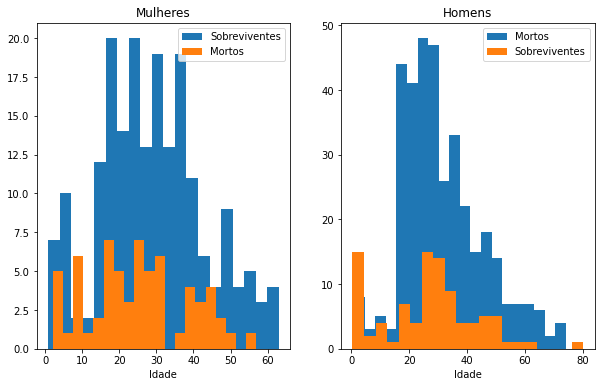

In [82]:
#Separando os dados das mulheres
mulheres = df_train[df_train['Sex']=='female']
homens = df_train[df_train['Sex']=='male']
fig, axes = plt.subplots(1,2,figsize=(10,6))
axes[0].hist(mulheres[mulheres['Survived']==1].Age.dropna(),bins=20)
axes[0].hist(mulheres[mulheres['Survived']==0].Age.dropna(),bins=20)
axes[0].set_xlabel('Idade')
axes[0].legend(['Sobreviventes','Mortos'])
axes[0].set_title('Mulheres')
axes[1].hist(homens[homens['Survived']==0].Age.dropna(),bins=20)
axes[1].hist(homens[homens['Survived']==1].Age.dropna(),bins=20)
axes[1].set_xlabel('Idade')
axes[1].legend(['Mortos','Sobreviventes'])
axes[1].set_title('Homens')


**Obs.1:** Observa-se que mais mulheres sobrevivem entre 20 a 30 anos (o que também é um pouco visto nos homens) e também há sobreviventes em ambos os gêneros para pessoas de pouca idade (crianças).

**Obs.2:** Como crianças e mulheres são salvos primeiro em acidentes desse tipo, é bem provável que idade e Sexo sejam bastante influentes na previsão de sobreviventes.

# Avaliando embarcação

*Qual dos 3 portos teve maior porcentagem de pessoas sobreviventes?

In [83]:
#Quais portos exitem?
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Text(0.5, 1.0, 'Porcentagem de mortos')

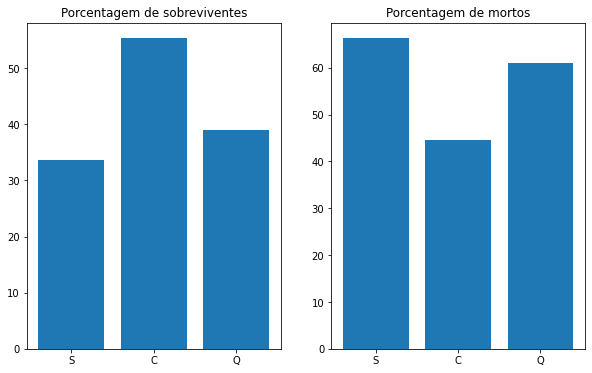

In [84]:
#Separando os dados das mulheres
porto_S = df_train[df_train['Embarked']=='S']
porto_C = df_train[df_train['Embarked']=='C']
porto_Q = df_train[df_train['Embarked']=='Q']
fig, axes = plt.subplots(1,2,figsize=(10,6))
axes[0].bar(['S','C','Q'],[(porto_S[porto_S['Survived']==1].Survived.count()/(porto_S['Survived'].count()))*100,(porto_C[porto_C['Survived']==1].Survived.count()/(porto_C['Survived'].count()))*100,(porto_Q[porto_Q['Survived']==1].Survived.count()/(porto_Q['Survived'].count()))*100])
axes[0].set_title('Porcentagem de sobreviventes')
axes[1].bar(['S','C','Q'],[(porto_S[porto_S['Survived']==0].Survived.count()/(porto_S['Survived'].count()))*100,(porto_C[porto_C['Survived']==0].Survived.count()/(porto_C['Survived'].count()))*100,(porto_Q[porto_Q['Survived']==0].Survived.count()/(porto_Q['Survived'].count()))*100])
axes[1].set_title('Porcentagem de mortos')


**Obs.1:** É possível notar que diferentes portos influenciam na porcentagem de pessoas que sobreviveram ou não.

# Avaliando as correlações entre as variáveis numéricas

In [85]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Pré-Processamento dos Dados

Precisaremos transformar os dados categóricos em numéricos, substituir dados ausentes e remover agumas variáveis.

In [86]:
#Como transformar o sex
def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0

#Criar a coluna 'Sex_binário':
df_train['Sex_binario'] = df_train['Sex'].map(transformar_sexo) #map aplica linha a linha

In [87]:
df_test['Sex_binario'] = df_test['Sex'].map(transformar_sexo) #map aplica linha a linha

In [88]:
#Variáveis sobre os títulos

#Mulheres
df_train['Nome_contem_Miss'] = df_train['Name'].str.contains('Miss').astype(int)
df_train['Nome_contem_Mrs'] = df_train['Name'].str.contains('Mrs').astype(int)

#Homens
df_train['Nome_contem_Master'] = df_train['Name'].str.contains('Master').astype(int)
df_train['Nome_contem_Col'] = df_train['Name'].str.contains('Col').astype(int)
df_train['Nome_contem_Major'] = df_train['Name'].str.contains('Major').astype(int)
df_train['Nome_contem_Mr'] = df_train['Name'].str.contains('Mr').astype(int)
#Mulheres
df_test['Nome_contem_Miss'] = df_test['Name'].str.contains('Miss').astype(int)
df_test['Nome_contem_Mrs'] = df_test['Name'].str.contains('Mrs').astype(int)

#Homens
df_test['Nome_contem_Master'] = df_test['Name'].str.contains('Master').astype(int)
df_test['Nome_contem_Col'] = df_test['Name'].str.contains('Col').astype(int)
df_test['Nome_contem_Major'] = df_test['Name'].str.contains('Major').astype(int)
df_test['Nome_contem_Mr'] = df_test['Name'].str.contains('Mr').astype(int)

In [89]:
#O valor comum então é S:
commom_value = 'S'
#Preenchendo os valores nulos com a string 'S'
df_train['Embarked'].fillna(commom_value,inplace=True)

In [90]:
#Variável embarked (Obs.: Podemos tirar uma, pois se ela não embarcou em C ou S, embarcom em Q)
df_train['Embarked_S'] = (df_train['Embarked'] == 'S').astype(int)
df_train['Embarked_C'] = (df_train['Embarked'] == 'C').astype(int)

#Variável embarked (Obs.: Podemos tirar uma, pois se ela não embarcou em C ou S, embarcom em Q)
df_test['Embarked_S'] = (df_test['Embarked'] == 'S').astype(int)
df_test['Embarked_C'] = (df_test['Embarked'] == 'C').astype(int)

In [91]:
#Substituindo a Fare nula pela média
df_test['Fare'].fillna(df_test['Fare'].mean(),inplace = True)

In [92]:
#Convertendo 'Fare' de float para inteiro
df_train['Fare']= df_train['Fare'].astype(int)
df_test['Fare']= df_test['Fare'].astype(int)

In [93]:
#substituindo os valores nulos por valores aleatórios
data = [df_train,df_test]
for dataset in data:
    media = df_train['Age'].mean()
    dvp = df_test['Age'].std()
    is_null = dataset['Age'].isnull().sum()

    #Computar números aleatórios entre a média, o dvp e o is_null
    rand_age = np.random.randint(media-dvp, media+dvp, size=is_null)

    #Preencher valores NaN na coluna idade com valores aleatórios gerados
    age_slice = dataset['Age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset['Age'] = age_slice
    dataset['Age'] = df_train['Age'].astype(int)

In [94]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PassengerId         891 non-null    int64 
 1   Survived            891 non-null    int64 
 2   Pclass              891 non-null    int64 
 3   Name                891 non-null    object
 4   Sex                 891 non-null    object
 5   Age                 891 non-null    int32 
 6   SibSp               891 non-null    int64 
 7   Parch               891 non-null    int64 
 8   Ticket              891 non-null    object
 9   Fare                891 non-null    int32 
 10  Cabin               204 non-null    object
 11  Embarked            891 non-null    object
 12  Sex_binario         891 non-null    int64 
 13  Nome_contem_Miss    891 non-null    int32 
 14  Nome_contem_Mrs     891 non-null    int32 
 15  Nome_contem_Master  891 non-null    int32 
 16  Nome_contem_Col     891 no

In [95]:
variaveis = ['Sex_binario','Age','Pclass','SibSp','Parch','Fare',
            'Embarked_S','Embarked_C','Nome_contem_Miss',
            'Nome_contem_Mrs','Nome_contem_Master','Nome_contem_Col',
            'Nome_contem_Major','Nome_contem_Mr']

In [96]:
X = df_train[variaveis]
Y = df_train['Survived']

In [97]:
X.isnull().sum()

Sex_binario           0
Age                   0
Pclass                0
SibSp                 0
Parch                 0
Fare                  0
Embarked_S            0
Embarked_C            0
Nome_contem_Miss      0
Nome_contem_Mrs       0
Nome_contem_Master    0
Nome_contem_Col       0
Nome_contem_Major     0
Nome_contem_Mr        0
dtype: int64

In [98]:
X_test = df_test[variaveis]

In [99]:
X_test.isnull().sum()

Sex_binario           0
Age                   0
Pclass                0
SibSp                 0
Parch                 0
Fare                  0
Embarked_S            0
Embarked_C            0
Nome_contem_Miss      0
Nome_contem_Mrs       0
Nome_contem_Master    0
Nome_contem_Col       0
Nome_contem_Major     0
Nome_contem_Mr        0
dtype: int64

In [100]:
import warnings
warnings.filterwarnings("ignore")

In [101]:
#Usando o repeated
kf = RepeatedKFold(n_splits=2,n_repeats=10,random_state=10)
#Lista com as acurárias
resultados1 = []
resultados2 = []
resultados3 = []
resultados4 = []
resultados5 = []
resultados6 = []
resultados7 = []

#Modelos
modelo_Lin = linear_model.SGDClassifier(max_iter=5, tol=None,random_state=0)
modelo_LR = LogisticRegression(solver='liblinear',random_state=0)
modelo_RF = RandomForestClassifier(n_estimators=400,n_jobs=-1,random_state=0)
modelo_Pe = Perceptron(max_iter=5,random_state=0)
modelo_AD = DecisionTreeClassifier(random_state=0)
modelo_SVM = SVC(kernel='rbf', gamma='scale', random_state=0)
modelo_Gauss = GaussianNB()

for linhas_treino, linhas_valid in kf.split(X):
    print('Treino:', linhas_treino.shape[0])
    print('Validação:', linhas_valid.shape[0])
    
    #Pegando as linhas manualmente para X_treino e X_valid
    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    #print(X_treino)
    #Pegando as linhas manualmente para Y_treino e Y_valid
    Y_treino, Y_valid = Y.iloc[linhas_treino], Y.iloc[linhas_valid]
    
    #Treinando o modelo
    modelo_Lin.fit(X_treino,Y_treino)
    modelo_LR.fit(X_treino,Y_treino)
    modelo_RF.fit(X_treino,Y_treino)
    modelo_Pe.fit(X_treino,Y_treino)
    modelo_AD.fit(X_treino,Y_treino)
    modelo_SVM.fit(X_treino,Y_treino)
    modelo_Gauss.fit(X_treino,Y_treino)
    
    #Predizendo agora com este modelo
    y_Lin = modelo_Lin.predict(X_valid)
    y_LR = modelo_LR.predict(X_valid)
    y_RF = modelo_RF.predict(X_valid)
    y_Pe = modelo_Pe.predict(X_valid)
    y_AD = modelo_AD.predict(X_valid)
    y_SVM = modelo_SVM.predict(X_valid)
    y_Gauss = modelo_Gauss.predict(X_valid)

    #Calculando a acurácia do modelo
    acc1 = np.mean(Y_valid == y_Lin)
    acc2= np.mean(Y_valid == y_LR)
    acc3 = np.mean(Y_valid == y_RF)
    acc4= np.mean(Y_valid == y_Pe)
    acc5 = np.mean(Y_valid == y_AD)
    acc6= np.mean(Y_valid == y_SVM)
    acc7 = np.mean(Y_valid == y_Gauss)
    resultados1.append(acc1)
    resultados2.append(acc2)
    resultados3.append(acc3)
    resultados4.append(acc4)
    resultados5.append(acc5)
    resultados6.append(acc6)
    resultados7.append(acc7)

    #Vendo a acurácia de cada um
    print(f'A acurácia do modelos modelos são {[acc1,acc2,acc3,acc4,acc5,acc6,acc7]}')

Treino: 445
Validação: 446
A acurácia do modelos modelos são [0.6367713004484304, 0.827354260089686, 0.7847533632286996, 0.6367713004484304, 0.7331838565022422, 0.6905829596412556, 0.8116591928251121]
Treino: 446
Validação: 445
A acurácia do modelos modelos são [0.5955056179775281, 0.8, 0.7820224719101123, 0.5955056179775281, 0.7595505617977528, 0.6382022471910113, 0.7707865168539326]
Treino: 445
Validação: 446
A acurácia do modelos modelos são [0.6121076233183856, 0.8318385650224215, 0.8251121076233184, 0.6704035874439462, 0.7511210762331838, 0.6905829596412556, 0.7017937219730942]
Treino: 446
Validação: 445
A acurácia do modelos modelos são [0.7235955056179775, 0.8067415730337079, 0.7820224719101123, 0.6853932584269663, 0.7640449438202247, 0.6494382022471911, 0.7707865168539326]
Treino: 445
Validação: 446
A acurácia do modelos modelos são [0.7466367713004485, 0.820627802690583, 0.8071748878923767, 0.7466367713004485, 0.7892376681614349, 0.6771300448430493, 0.7825112107623319]
Treino:

In [102]:
#Modelos
resultados = [np.mean(resultados1),np.mean(resultados2),
                np.mean(resultados3),np.mean(resultados4),np.mean(resultados5),np.mean(resultados5),np.mean(resultados7)]
print(resultados)

[0.6179170655514687, 0.8213153121378547, 0.799994457600645, 0.6165654758905628, 0.7613896306746611, 0.7613896306746611, 0.7624996221091349]


In [103]:
#A regressão Logística apresentou os melhores modelos

In [104]:
#Fazendo a predição do modelo
y_predict_LR = modelo_LR.predict(X_test)

In [105]:
#Criar a submission
sub = pd.Series(y_predict_LR, index=df_test['PassengerId'], name='Survived')
sub.shape

(418,)

In [106]:
sub.to_csv('modelo_RL.csv',header=True)

In [165]:
#Usando Grid Search para melhorar os modelos
from sklearn.model_selection import GridSearchCV
#parameters = {'penalty':('l1', 'l2', 'elasticnet', 'none'), 'C':list(range(-10,10,1)), 'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')}
parameters = {'penalty':('l1', 'l2', 'elasticnet', 'none'), 'C':np.logspace(-3,3,7), 'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')}
grid = GridSearchCV(lr,parameters, cv=10, scoring='accuracy')

In [166]:
#Treinar o modelo
grid.fit(X,Y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ('l1', 'l2', 'elasticnet', 'none'),
                         'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga')},
             scoring='accuracy')

In [167]:
print("tuned hpyerparameters :(best parameters) ",grid.best_params_)
print("accuracy :",grid.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.8305118601747814


In [168]:
ypredict_ModeloOTM = grid.predict(X_test)

In [169]:
#Criar a submission
sub = pd.Series(ypredict_ModeloOTM, index=df_test['PassengerId'], name='Survived')
sub.shape

(418,)

In [170]:
sub.to_csv('modelo_RL_New.csv',header=True)